In [31]:
!wget https://github.com/javierherrera1996/IntroMachineLearning/raw/refs/heads/main/SegundoCorte/loan_approval_dataset.csv

--2025-04-30 23:05:53--  https://github.com/javierherrera1996/IntroMachineLearning/raw/refs/heads/main/SegundoCorte/loan_approval_dataset.csv
Resolving github.com (github.com)... 140.82.116.4
Connecting to github.com (github.com)|140.82.116.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/javierherrera1996/IntroMachineLearning/refs/heads/main/SegundoCorte/loan_approval_dataset.csv [following]
--2025-04-30 23:05:53--  https://raw.githubusercontent.com/javierherrera1996/IntroMachineLearning/refs/heads/main/SegundoCorte/loan_approval_dataset.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.108.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 384337 (375K) [text/plain]
Saving to: ‘loan_approval_dataset.csv.1’

loan_approval_datas 100%[===========

In [32]:
!pip install imblearn
!pip install numpy
import pandas as pd
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix

In [33]:
df = pd.read_csv('loan_approval_dataset.csv')
df.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   loan_id                    4269 non-null   int64 
 1    no_of_dependents          4269 non-null   int64 
 2    education                 4269 non-null   object
 3    self_employed             4269 non-null   object
 4    income_annum              4269 non-null   int64 
 5    loan_amount               4269 non-null   int64 
 6    loan_term                 4269 non-null   int64 
 7    cibil_score               4269 non-null   int64 
 8    residential_assets_value  4269 non-null   int64 
 9    commercial_assets_value   4269 non-null   int64 
 10   luxury_assets_value       4269 non-null   int64 
 11   bank_asset_value          4269 non-null   int64 
 12   loan_status               4269 non-null   object
dtypes: int64(10), object(3)
memory usage: 433.7+ KB


#**2 Preguntas Te´oricas**

Responde las siguientes preguntas relacionadas con los conceptos de an´alisis de datos, estad´ısticas y
Machine Learning.

#**2.1 Pregunta 1: An´alisis Exploratorio de Datos (EDA)**
¿Qu´e pasos seguir´ıas para realizar un an´alisis exploratorio de los datos antes de construir un modelo de
Machine Learning? Explica cada paso y menciona las herramientas que utilizar´ıas

**Inicialmente se debe cargar el dataset, hacer una visualizacion general de los datos por medio de funciones como .head() .info() y .describe() y realizar una limpieza de datos nulos**

#**2.2 Pregunta 2: Preprocesamiento de Datos**
Imagina que uno de los datos contiene valores faltantes o at´ıpicos (outliers). ¿Qu´e t´ecnicas utilizar´ıas
para tratar con estos problemas en el conjunto de datos de la tabla? Justifica tu respuesta

**En esta caso se utiliza la funcion .dropna para eliminar los datos nulos lo cual puede comprometer la robustes de los datos o .fillna para sustituir esos valores**

#**2.3 Pregunta 3: Modelos de Clasificaci´on**
En este caso, el objetivo es predecir si un pr´estamo ser´a aprobado o rechazado en funci´on de las caracter´ısticas del solicitante. ¿Qu´e tipo de modelo de clasificaci´on usar´ıas y por qu´e? Discute las ventajas y
desventajas de este modelo.

**Plantearia un modelo de regresion logistica para determinar esta variable binaria (Se aprueba el prestamo/ No se aprueba el prestamos), esto considerando que es un modelo optimo para permitirnos como las diferentes variables pueden determinar la variable independiente de forma relativamente sencilla; aunque este modelo depende de gran forma en el grado de correlacion entre variables por lo que si es bajo, la eficiencia del modelo podria ser baja**

#**2.4 Pregunta 4: Desbalanceo de Clases**
¿Qu´e es el desbalanceo de clases y por qu´e es un problema al entrenar un modelo de clasificaci´on? ¿Qu´e
t´ecnicas utilizar´ıas para abordar este problema, como SMOTE?

**EL desbalanceo de clases es un problema que se puede presentar en el entrenamiento de un modelo, en el cual una de las clases "estudiada" por el modelo puede estar sobrerepresentada en relacion a la otra, por lo que el modelo se vuelve muy bueno en casos como el sobrerepresentado; mientras que para el tratamiento de datos de la otra clase mostrara problemas de generalizacion. La funcion SMOTE elimina datos aleatorios de la funcion sobrerepresentada para balancear los datos.**

#**2.5 Pregunta 5: Overfitting**
¿Qu´e es el overfitting y c´omo puedes detectarlo en un modelo de Machine Learning? Explica qu´e medidas
tomar´ıas para evitar el sobreajuste y mejorar la capacidad de generalizaci´on de tu modelo.

**El overfitting o sobreajuste es un problema que puede presentar un modelo cuando se ajusta demasiado al tratamiento de una clase o resolucion de un solo tipo de problemas, por lo que al momento de enfrentarse a datos de prueba muestra un menor rendimiento producto de una baja capacidad para generalizar, esto puede ser corregido por medio de la estratificacion de los datos de entrenamiento o la simplificacion de los criterios del modelo**

#**3 Ejercicios Pr´acticos**
#**3.1 Ejercicio 1: An´alisis Descriptivo**
Usa la tabla de datos proporcionada para realizar un an´alisis descriptivo de las variables num´ericas.
Responde a las siguientes preguntas:

• ¿Cu´al es el promedio de los ingresos anuales (income annum) de los solicitantes?
**5.059124e+06**

• ¿Cu´al es el puntaje CIBIL promedio de los solicitantes cuyo pr´estamo fue aprobado? **703.4619728915662**

• ¿Cu´al es la duraci´on promedio de los pr´estamos (loan term)?
**10.900445069102835 años**

In [35]:
df.describe()

,loan_id,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
count,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4.269000e+03,4.269000e+03
mean,2135.000000,2.498712,5.059124e+06,1.513345e+07,10.900445,599.936051,7.472617e+06,4.973155e+06,1.512631e+07,4.976692e+06
std,1232.498479,1.695910,2.806840e+06,9.043363e+06,5.709187,172.430401,6.503637e+06,4.388966e+06,9.103754e+06,3.250185e+06
min,1.000000,0.000000,2.000000e+05,3.000000e+05,2.000000,300.000000,-1.000000e+05,0.000000e+00,3.000000e+05,0.000000e+00
25%,1068.000000,1.000000,2.700000e+06,7.700000e+06,6.000000,453.000000,2.200000e+06,1.300000e+06,7.500000e+06,2.300000e+06
50%,2135.000000,3.000000,5.100000e+06,1.450000e+07,10.000000,600.000000,5.600000e+06,3.700000e+06,1.460000e+07,4.600000e+06
75%,3202.000000,4.000000,7.500000e+06,2.150000e+07,16.000000,748.000000,1.130000e+07,7.600000e+06,2.170000e+07,7.100000e+06
max,4269.000000,5.000000,9.900000e+06,3.950000e+07,20.000000,900.000000,2.910000e+07,1.940000e+07,3.920000e+07,1.470000e+07


In [36]:
average_cibil_approved = df[df[' loan_status'] == ' Approved'][' cibil_score'].mean()
print(f"The average CIBIL score for approved loans is: {average_cibil_approved}")

The average CIBIL score for approved loans is: 703.4619728915662


In [37]:
duracion_promedio = df[' loan_term'].mean()
print(f"La duración promedio de los préstamos es: {duracion_promedio} años")

La duración promedio de los préstamos es: 10.900445069102835 años


#**3.2 Ejercicio 2: Preprocesamiento de Datos**
Realiza los siguientes pasos de preprocesamiento:

• Convierte la variable education en una variable binaria (0: Not Graduate, 1: Graduate).

• Convierte la variable self employed en una variable binaria (0: No, 1: Yes).

• Rellena los valores faltantes, si los hubiera, con la media de la columna correspondiente

In [38]:
df.isnull().sum()

,0
loan_id,0
no_of_dependents,0
education,0
self_employed,0
income_annum,0
loan_amount,0
loan_term,0
cibil_score,0
residential_assets_value,0
commercial_assets_value,0


In [39]:
df[" education"].unique()

array([' Graduate', ' Not Graduate'], dtype=object)

In [40]:
print(df[df[" education"].isna()])

Empty DataFrame
Columns: [loan_id,  no_of_dependents,  education,  self_employed,  income_annum,  loan_amount,  loan_term,  cibil_score,  residential_assets_value,  commercial_assets_value,  luxury_assets_value,  bank_asset_value,  loan_status]
Index: []


In [41]:
df[" education"] = df[" education"].astype(str).str.strip().str.lower().map({
    "graduate": 1,
    "not graduate": 0
})
df

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,1,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,0,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,1,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,1,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,0,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4264,4265,5,1,Yes,1000000,2300000,12,317,2800000,500000,3300000,800000,Rejected
4265,4266,0,0,Yes,3300000,11300000,20,559,4200000,2900000,11000000,1900000,Approved
4266,4267,2,0,No,6500000,23900000,18,457,1200000,12400000,18100000,7300000,Rejected
4267,4268,1,0,No,4100000,12800000,8,780,8200000,700000,14100000,5800000,Approved


In [42]:
df[" self_employed"].unique()

array([' No', ' Yes'], dtype=object)

In [43]:
print(df[df[" self_employed"].isna()])

Empty DataFrame
Columns: [loan_id,  no_of_dependents,  education,  self_employed,  income_annum,  loan_amount,  loan_term,  cibil_score,  residential_assets_value,  commercial_assets_value,  luxury_assets_value,  bank_asset_value,  loan_status]
Index: []


In [44]:
df[" self_employed"] = df[" self_employed"].astype(str).str.strip().str.lower().map({
    "yes": 1,
    "no": 0
})
df

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,1,0,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,0,1,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,1,0,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,1,0,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,0,1,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4264,4265,5,1,1,1000000,2300000,12,317,2800000,500000,3300000,800000,Rejected
4265,4266,0,0,1,3300000,11300000,20,559,4200000,2900000,11000000,1900000,Approved
4266,4267,2,0,0,6500000,23900000,18,457,1200000,12400000,18100000,7300000,Rejected
4267,4268,1,0,0,4100000,12800000,8,780,8200000,700000,14100000,5800000,Approved


#**3.3 Ejercicio 3: An´alisis de Correlaci´on**
Realiza un an´alisis de correlaci´on entre las siguientes variables:

• income annum y loan amount

• cibil score y loan amount


• residential assets value y commercial assets value


Discute los resultados obtenidos, ¿existen correlaciones fuertes entre algunas variables? ¿C´omo afectar´ıa
esto a un modelo predictivo?

**Existe una fuerte correlacion entre la cantidad de ingresos y la cantidad del prestamo, una correlacion moderada para los bienes residenciales y comerciales y un correlacion nula entre cibil score con las otras variables, lo que indica que el cibil score puede darle una complejidad innecesaria al modelo; mientras las otras variables relacionadas pueden tener un peso en si se autoriza o no el prestamo**

<Axes: >

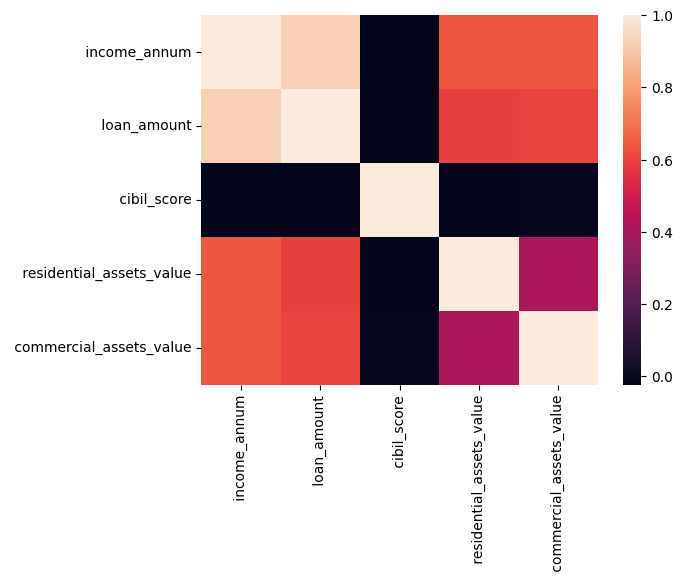

In [17]:
import seaborn as sns
numerical_features1 = [' income_annum', ' loan_amount', ' cibil_score',
       ' residential_assets_value', ' commercial_assets_value']


correlation_matrix = df[numerical_features1].corr()
sns.heatmap(correlation_matrix)

#**3.4 Ejercicio 4: Comparaci´on de Modelos de Clasificaci´on**
Usando la tabla de datos, entrena dos modelos de clasificaci´on: Regresi´on Log´ıstica y Arbol de ´
Decisi´on para predecir el estado del pr´estamo (loan status). Compara los modelos utilizando la
m´etrica ROC AUC. Para esto, sigue los pasos:

• Preprocesa los datos (conversi´on de variables categ´oricas, manejo de valores faltantes).

• Divide los datos en un conjunto de entrenamiento y uno de prueba.

• Entrena los modelos de Regresi´on Log´ıstica y Arbol de Decisi´on ´ .

• Hay alguna evidencia de overfitting si/no .

• Calcula la m´etrica ROC AUC para cada modelo y comp´aralos.

• Si detectas desbalanceo de clases, aplica SMOTE para equilibrar el dataset antes de entrenar los
modelos.

Discute los resultados obtenidos. ¿Cu´al modelo es el m´as adecuado para este problema? ¿Por qu´e?

In [19]:
X = df[[" cibil_score", " loan_term"]]
y = df[" loan_status"]

X.isnull().sum()

,0
cibil_score,0
loan_term,0


In [20]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

print("Dimensiones del conjunto de entrenamiento:", X_train.shape)
print("Dimensiones del conjunto de prueba:", X_test.shape)

print("Distribución de clases en entrenamiento (proporciones):")
print(y_train.value_counts(normalize=True))

Dimensiones del conjunto de entrenamiento: (3415, 2)
Dimensiones del conjunto de prueba: (854, 2)
Distribución de clases en entrenamiento (proporciones):
 loan_status
Approved    0.622255
Rejected    0.377745
Name: proportion, dtype: float64


In [21]:
from imblearn.over_sampling import SMOTE
if y_train.value_counts(normalize=True).max() > 0.60:
    print("Aplicando SMOTE para balancear el conjunto de entrenamiento...")

    smote = SMOTE(random_state=42)
    X_train, y_train = smote.fit_resample(X_train, y_train)
    print("Nueva distribución de clases:")
    print(pd.Series(y_train).value_counts(normalize=True))

Aplicando SMOTE para balancear el conjunto de entrenamiento...
Nueva distribución de clases:
 loan_status
Rejected    0.5
Approved    0.5
Name: proportion, dtype: float64


In [49]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

logreg_model = LogisticRegression(random_state=42)
logreg_model.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [50]:
tree_model = DecisionTreeClassifier(random_state=42)
tree_model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [47]:
logreg_probs = logreg_model.predict_proba(X_test)[:, 1]
tree_probs = tree_model.predict_proba(X_test)[:, 1]

logreg_roc_auc = roc_auc_score(y_test, logreg_probs)
tree_roc_auc = roc_auc_score(y_test, tree_probs)

print(f"Logistic Regression ROC AUC: {logreg_roc_auc}")
print(f"Decision Tree ROC AUC: {tree_roc_auc}")


Logistic Regression ROC AUC: 0.9737949893011026
Decision Tree ROC AUC: 0.9618862710115267


In [55]:
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
plt.plot(roc_curve(y_test, logreg_probs)[0], roc_curve(y_test, logreg_probs)[1], label=f"Logistic Regression (AUC = {logreg_roc_auc:.2f})")
plt.plot(roc_curve(y_test, tree_probs)[0], roc_curve(y_test, tree_probs)[1], label=f"Decision Tree (AUC = {tree_roc_auc:.2f})")
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.show()

ValueError: y_true takes value in {' Approved', ' Rejected'} and pos_label is not specified: either make y_true take value in {0, 1} or {-1, 1} or pass pos_label explicitly.

<Figure size 800x600 with 0 Axes>

3.5 Ejercicio 5: Evaluaci´on del Desempe˜no del Modelo
Despu´es de entrenar los modelos, eval´ua su desempe˜no usando m´etricas adicionales como precisi´on, recall, F1 y la matriz de confusi´on. Responde las siguientes preguntas:

• ¿Qu´e modelo tiene el mejor desempe˜no general? Justifica tu respuesta utilizando las m´etricas.

• ¿C´omo impacta el desbalanceo de clases en la m´etrica ROC AUC y en otras m´etricas?

• ¿Qu´e acciones tomar´ıas si el modelo tiene un alto sesgo hacia la clase mayoritaria